## <h1>Lesson 2. Regression analysis: How Much Is Your Car Worth?</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/Kelley_Blue_Book_Vertical.JPG/152px-Kelley_Blue_Book_Vertical.JPG" style="height:200px;">
  
  <p>This exercise will use data collected from <a href="https://www.kbb.com/">Kelly Blue Book</a> for 2005 for used General Motors (GM) cars. The overall goal is to predict the suggested retail price of the car (<a href="http://ww2.amstat.org/publications/jse/jse_data_archive.htm">Kuiper (2008), JSE</a>).</p>

<p>The following features are available for this dataset:</p>
<ul>
<li>Price: Suggested retail price of the used 2005 GM car</li>
<li>Mileage: Car mileage</li>
<li>Cylinder: Number of cylinders in the engine</li>
<li>Doors: Number of doors</li>
<li>Cruise: Does it have cruise control</li>
<li>Sound: Does it have upgraded sound?</li>
<li>Leather: Does it have leather seats?</li>
<li>Make columns (indicator variables):
    <ul>
        <li>Buick</li>
        <li>Cadillac</li>
        <li>Chevy</li>
        <li>Pontiac</li>
        <li>Saab</li>
        <li>...</li>
    </ul>
</li>
<li>Body Type columns (indicator variables):
    <ul>
        <li>convertible</li>
        <li>coupe</li>
        <li>hatchback</li>
        <li>sedan</li>
        <li>...</li>
    </ul>
</li>
</ul>


In [1]:
import pandas as pd

cars = pd.read_csv('cars.csv')
cars.head()
cars.describe()

,Price,Mileage,Cylinder,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevy,Pontiac,Saab,Saturn,convertible,coupe,hatchback,sedan,wagon
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143756,19831.934080,5.268657,3.527363,0.752488,0.679104,0.723881,0.099502,0.099502,0.398010,0.186567,0.141791,0.074627,0.062189,0.174129,0.074627,0.609453,0.079602
std,9884.852799,8196.319707,1.387531,0.850169,0.431836,0.467111,0.447355,0.299522,0.299522,0.489792,0.389806,0.349053,0.262952,0.241649,0.379457,0.262952,0.488177,0.270845
min,8638.930000,266.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14273.075000,14623.500000,4.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18024.995000,20913.500000,6.000000,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,26717.317500,25213.000000,6.000000,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,70755.470000,50387.000000,8.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [2]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 18 columns):
Price          804 non-null float64
Mileage        804 non-null int64
Cylinder       804 non-null int64
Doors          804 non-null int64
Cruise         804 non-null int64
Sound          804 non-null int64
Leather        804 non-null int64
Buick          804 non-null int64
Cadillac       804 non-null int64
Chevy          804 non-null int64
Pontiac        804 non-null int64
Saab           804 non-null int64
Saturn         804 non-null int64
convertible    804 non-null int64
coupe          804 non-null int64
hatchback      804 non-null int64
sedan          804 non-null int64
wagon          804 non-null int64
dtypes: float64(1), int64(17)
memory usage: 113.1 KB


<h3>Q.0 What is minimum priced car? The maximum priced? What is the lowest, highest, and average mileage? How many rows of data are there? How many columns? Do any of the columns have null values?</h3>

In [15]:
# Put the command (or commands) here to answer the questions above.
#Find the index of minimum priced car
min_price = cars['Price'].idxmin()

#Print the minimum priced car row.
print(cars.loc[[min_price]])

max_price = cars['Price'].idxmax()

print(cars.loc[[max_price]])

print("minimum mileage")
print(cars['Mileage'].min())

print("highest mileage")
print(cars['Mileage'].max())

print("mean mileage")
print(cars['Mileage'].mean())

print("number of rows")
print(len(cars))

print("number of columns")
print(len(cars.columns))

print("Do any of the columns have null values")
cars.columns[cars.isna().any()].tolist()

# no there isn't any

       Price  Mileage  Cylinder  Doors  Cruise  Sound  Leather  Buick  \
567  8638.93    25216         4      4       0      0        0      0   

     Cadillac  Chevy  Pontiac  Saab  Saturn  convertible  coupe  hatchback  \
567         0      1        0     0       0            0      0          0   

     sedan  wagon  
567      1      0  
        Price  Mileage  Cylinder  Doors  Cruise  Sound  Leather  Buick  \
195  70755.47      583         8      2       1      1        1      0   

     Cadillac  Chevy  Pontiac  Saab  Saturn  convertible  coupe  hatchback  \
195         1      0        0     0       0            1      0          0   

     sedan  wagon  
195      0      0  
minimum mileage
266
highest mileage
50387
mean mileage
19831.93407960199
number of rows
804
number of columns
18
Do any of the columns have null values


[]

<h3>Q.1. Plot Price vs. Mileage. From the plot, does it seem like cars with more mileage are worth less?</h3>

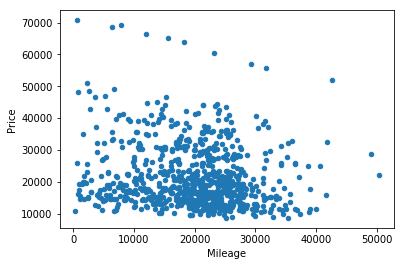

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Put the command (or commands) here that would give answer to the above question.
cars
cars.plot(kind='scatter', x='Mileage', y='Price')
plt.show()


# from the plot, it does seem like cars with more mileage are worth less

<h3>Q.2. Develop a simple linear regression model, relating price with mileage only. Show summary statistics for the model.</h3> 

In [3]:
import numpy as np
import pandas
from pandas import DataFrame, Series
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats 
from scipy.stats import pearsonr
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split 

corr, _ = pearsonr(cars['Mileage'], cars['Price'])
print('Pearsons correlation: %.3f' % corr)

#Pearsons correlation: -0.143

slope, intercept, r_value, p_value, std_err = stats.linregress(cars['Mileage'], cars['Price'])
print(slope, intercept,r_value, p_value, std_err)

# Linear regression model: Price = 24764.558 - .1725*Mileage

def predict(x):
    return slope * x + intercept #equation of a line f(x)

fitLine = predict(cars['Mileage'])

plt.scatter(cars['Mileage'], cars['Price'])
plt.plot(cars['Mileage'], fitLine, c='r')
plt.show()

print(predict(22479))
print('r2 value:', r_value ** 2)

#-------------------------------------------------------------------------------------------------------
# Find the model using LinearRegression and calculate summary of model
X = cars['Mileage'].values.reshape(-1,1)
y = cars['Price'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 value:', metrics.r2_score(y_test, y_pred))

#-------------------------------------------------

### STATSMODELS ###

# create a fitted model
lm = smf.ols(formula='Price ~ Mileage', data=cars[["Price", "Mileage"]]).fit()

# print the coefficients
lm.params
lm.summary()

Pearsons correlation: -0.143
-0.17252050260202134 24764.558991201993 -0.1430505060653787 4.684698031518038e-05 0.04214775583437192


/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<Figure size 640x480 with 1 Axes>

20886.470613211157
r2 value: 0.020463447285560946
[25471.21308145]
[[-0.21327711]]
Mean Absolute Error: 7910.7552539401695
Mean Squared Error: 98834823.21050867
Root Mean Squared Error: 9941.570459968016
R2 value: -0.02448731521086689


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     16.75
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           4.68e-05
Time:                        18:13:48   Log-Likelihood:                -8527.8
No. Observations:                 804   AIC:                         1.706e+04
Df Residuals:                     802   BIC:                         1.707e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.476e+04    904.363     27.383      0.000     2.3e+04    2.65e+04
Mileage       -0.1725      0.042     -4.093      0.000      -0.255      -0.090
==============================================================================
Omnibus:                      236.450   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              605.297
Skew:                           1.522   Prob(JB):                    3.64e-132
Kurtosis:                       5.966   Cond. No.                     5.62e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h3>Q.3. What happens to price when there is one more mile on the car?</h3>

In [5]:
# Command:
#Price = 24764.558 - .1725*Mileage

print(predict(0) - predict(1))

# One sentence summary:
# Price reduces by .1725 with one more increase in mile.

0.17252050260140095


<h3>Q.4. What is the expected value of a car with 0 miles according to your model?</h3>

In [11]:
# Single command
print(predict(0))

24764.558991201993


<h3>Q.5. Plot residuals of the model vs. fitted values. Are there any problems that you see with the model?</h3>

21343.143756218902


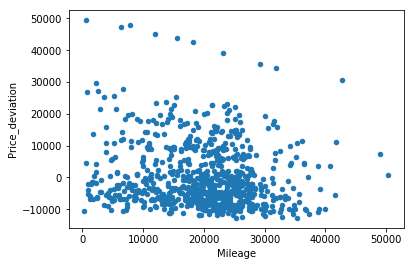

Text(0,0.5,'Residuals')

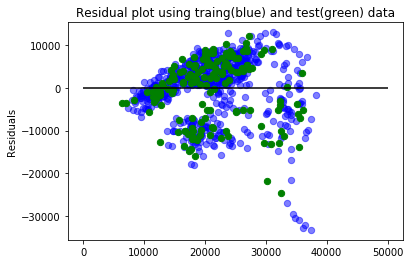

In [43]:
import matplotlib.pyplot as plt

# Plot deviations
mean_price = cars['Price'].mean()
print(mean_price)

cars['Price_deviation'] = cars['Price'] - mean_price
cars.head()

cars.plot(kind='scatter', x='Mileage', y='Price_deviation')
plt.show()

plt.scatter(regressor.predict(X_train), regressor.predict(X_train) - y_train, c='b', s=40, alpha=0.5) 
plt.scatter(regressor.predict(X_test), regressor.predict(X_test) - y_test, c='g', s=40)
plt.hlines(y=0, xmin=0, xmax=50000)
plt.title("Residual plot using traing(blue) and test(green) data")
plt.ylabel('Residuals')

# Explain whether there are any problems (1-2 sentence)
# There are some outliers in data. To better the model, we can remove them from the dataset.
# Residuals looks to be centred along +- 10000 mostly otherwise. As the model is not a good fit (based on R-Square, MSE, MAE, RSME), this value is high

<h3>Q.6. Develop a model that predicts the Price from Mileage, Cylinder, Doors, Cruise, Sound, Leather data. Is this model more accurate - explain why (1-2 sentence). </h3>

In [6]:
# Commands:
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split 
import statsmodels.formula.api as smf

X = cars[["Mileage", "Cylinder", "Doors", "Cruise", "Sound", "Leather"]].values

Y = cars['Price'].values
Y

regressor = LinearRegression()
regressor.fit(X, Y)
print(regressor.coef_)
print(regressor.intercept_)

y_pred = regressor_train.predict(X)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y, y_pred)))
print('R2 value:', metrics.r2_score(Y, y_pred))

#---------------------------------------------------------------------------------------------
### STATSMODELS ###

# create a fitted model with all the features
lm1 = smf.ols(formula='Price ~ Mileage + Cylinder + Doors + Cruise + Sound + Leather', data=cars[["Price", "Mileage", "Cylinder", "Doors", "Cruise", "Sound", "Leather"]]).fit()

# print the coefficients
lm1.params

# print a summary of the fitted model
lm1.summary()

# Explanation:
# Yes this model is more accurate. R-Square value is higher than the previous one.
# Adjusted R-Square value is also higher.
# Also when we train and tested on data, MAE, MSE, RMSE are all less for the new model

[-1.70517079e-01  3.20012459e+03 -1.46339911e+03  6.20551128e+03
 -2.02440111e+03  3.32714352e+03]
7323.164640767853
Mean Absolute Error: 5797.269111059225
Mean Squared Error: 54196166.93795225
Root Mean Squared Error: 7361.804597919741
R2 value: 0.4446475878443379


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     106.8
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           1.23e-98
Time:                        19:04:09   Log-Likelihood:                -8298.9
No. Observations:                 804   AIC:                         1.661e+04
Df Residuals:                     797   BIC:                         1.664e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7323.1646   1770.837      4.135      0.000    3847.110    1.08e+04
Mileage       -0.1705      0.032     -5.352      0.000      -0.233      -0.108
Cylinder    3200.1246    202.983     15.765      0.000    2801.680    3598.570
Doors      -1463.3991    308.274     -4.747      0.000   -2068.525    -858.273
Cruise      6205.5113    651.463      9.525      0.000    4926.724    7484.298
Sound      -2024.4011    570.718     -3.547      0.000   -3144.690    -904.113
Leather     3327.1435    597.114      5.572      0.000    2155.041    4499.246
==============================================================================
Omnibus:                      145.941   Durbin-Watson:                   0.498
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.863
Skew:                           1.098   Prob(JB):                     6.15e-57
Kurtosis:                       4.703   Cond. No.                     1.48e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h3>Q.7. Are any of the features in the above model highly colinear to the point where they impact the model quality?</h3>

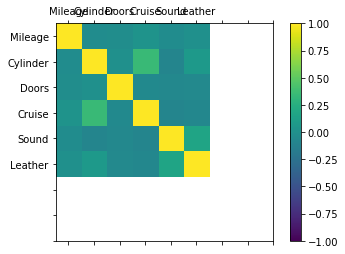

          Cylinder    Cruise
Cylinder  1.000000  0.354285
Cruise    0.354285  1.000000


[46.20228964701834,
 1.0034206085835984,
 1.1672715954934278,
 1.0107674046031307,
 1.164616473456475,
 1.0458037939693998,
 1.0499899994385908]

In [39]:
import matplotlib.pyplot as plt
import pandas
import numpy
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Command(s):
filteredColumns = cars.filter(["Mileage", "Cylinder", "Doors", "Cruise", "Sound", "Leather"], axis=1)

filteredColumns
names = ["Mileage", "Cylinder", "Doors", "Cruise", "Sound", "Leather"]
correlations = filteredColumns.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

# Comment on the result
# It appears that Cruise and Cylinder are correlated to a certain extent from correlation matrix.
print(cars[["Cylinder","Cruise"]].corr())

# Calculate VIF of the features.
ck = lm1.model.exog
vif = [variance_inflation_factor(ck, i) for i in range(ck.shape[1])]
vif


# Based on VIF calculation, it appears none of the features are highly collinear to the point, where they impact the model quality 

<h3>Q.8. What is the expected price for the Chevy sedan described in variable 'chevy', shown below?</h3>

In [5]:
#chevy = c("Mileage"=30000, "Cylinder"=4, "Doors"=2, "Cruise"=1, "Sound"=1, "Leather"=1)
# Commands that estimate the price of 'chevy' using the model with 6 predictors
df[[‘feature 1’, ‘feature 2’, ‘feature 3’]]

chevy = regressor.predict([[30000,4,2,1,1,1]])
chevy

PatsyError: Error evaluating factor: NameError: name 'Mileage' is not defined
    Price ~ Mileage + Cylinder + Doors + Cruise + Sound + Leather
            ^^^^^^^

<h3>Q.9. What is the expected price for the Chevy mentioned above if you include all features in the prediction? Can you comment on any problems you encounter when doing this prediction?</h3>

In [8]:
# Commands
from sklearn import linear_model
X2 = cars[["Mileage", "Cylinder", "Doors", "Cruise", "Sound", "Leather", "Buick", "Cadillac", "Chevy", "Pontiac", "Saab","Saturn","convertible","coupe","hatchback","sedan","wagon"]].values

Y2 = cars['Price'].values
Y2

regressor2 = LinearRegression()
regressor2.fit(X2, Y2)
chevy2 = regressor2.predict([[30000,4,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0]])
print(chevy2)

#---------------------------------------------------------------------------------------------
### STATSMODELS ###
# create a fitted model with all the features
lm2 = smf.ols(formula='Price ~ Mileage + Cylinder + Doors + Cruise + Sound + Leather + Buick + Cadillac + Chevy + Pontiac + Saab + Saturn + convertible + coupe + hatchback + sedan + wagon', data=cars[["Price", "Mileage", "Cylinder", "Doors", "Cruise", "Sound", "Leather", "Buick", "Cadillac", "Chevy", "Pontiac", "Saab", "Saturn", "convertible","coupe","hatchback","sedan","wagon"]]).fit()

# print the coefficients
lm2.params

# print a summary of the fitted model
lm2.summary()

# Comments on problems
# Input values for the other features are not mentioned. I have considered 0 for them.
# Overall I see this model to have a much better R-square adjusted value.
# from model summary it looks like p_value for features: 'Cruise' and 'Coupe' are high.
# This signifies that they are not related to 'Price' as much. We can try to build model without them to see, if the R-Square value further increases.

[21693.25465352]
           coupe    Cruise
coupe   1.000000 -0.040646
Cruise -0.040646  1.000000


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     607.2
Date:                Sun, 19 Apr 2020   Prob (F-statistic):               0.00
Time:                        19:32:00   Log-Likelihood:                -7544.8
No. Observations:                 804   AIC:                         1.512e+04
Df Residuals:                     789   BIC:                         1.519e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5095.0985    281.571     18.095      0.000    4542.381    5647.816
Mileage        -0.1842      0.013    -14.664      0.000      -0.209      -0.160
Cylinder     3659.4543    113.345     32.286      0.000    3436.961    3881.947
Doors         336.2243    121.850      2.759      0.006      97.036     575.412
Cruise        340.8695    295.962      1.152      0.250    -240.096     921.835
Sound         440.9169    234.484      1.880      0.060     -19.370     901.204
Leather       790.8220    249.745      3.167      0.002     300.579    1281.065
Buick       -2309.6444    327.741     -7.047      0.000   -2952.992   -1666.297
Cadillac     1.011e+04    397.033     25.451      0.000    9325.660    1.09e+04
Chevy       -3806.5555    211.448    -18.002      0.000   -4221.623   -3391.488
Pontiac     -4657.2319    248.970    -18.706      0.000   -5145.954   -4168.510
Saab         9020.8535    335.112     26.919      0.000    8363.037    9678.670
Saturn      -3257.3494    361.703     -9.006      0.000   -3967.364   -2547.335
convertible  1.052e+04    431.961     24.359      0.000    9674.408    1.14e+04
coupe        -500.2509    317.414     -1.576      0.115   -1123.327     122.826
hatchback   -4400.5160    331.477    -13.275      0.000   -5051.197   -3749.835
sedan       -2487.9140    206.513    -12.047      0.000   -2893.294   -2082.534
wagon        1961.4436    350.823      5.591      0.000    1272.787    2650.100
==============================================================================
Omnibus:                       68.748   Durbin-Watson:                   0.700
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.096
Skew:                           0.376   Prob(JB):                     9.76e-49
Kurtosis:                       5.457   Cond. No.                     3.04e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.01e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<h3>Q.10. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

In [ ]:
# enter your response here
I faced some difficulties with this assignment. Most of my problems were related to understanding what scikit learn methods to use
to figure out the Linear regression model. Eventually I started getting some sense, as I started playing with all the different ways.
For example, I used "linregress", then "LinearRegression", and then "statsmodels.OLS".

I have tried to go in depth with each question. I have played with all the options.
For example, the question with high collinearity, I plotted correlation matrix as well as figured out VIF.
I tried to play with the data set as much as possible and have spent extra time for this.

Overall I am satisfied with the learnings I have gathered.

In real world, our team does a lot of timeseries-forecasting. When linear regression might be over-simple model for that scenario, this
was a good stepping stone in that direction.

I still can play with the Forward selection, Backward selection to see how removing/adding some predictors can improve model.